Arnie Larson<br>

#### Sanity Testing my code module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import signal
from scipy.io import wavfile
import alarso_doppler as dop

In [10]:
a = np.ones(2)
b = np.array([1.0, 2.0])
print("b.shape: {}".format(b.shape))
r=np.array([[np.cos(1), -np.sin(1)],[np.sin(1), np.cos(1)]])
c=np.matmul(r,b)
print("c.shape: {}".format(c.shape))
print("c: {}, {}".format(c[0], c[1]))


b.shape: (2,)
c.shape: (2,)
c: -1.1426396637476532, 1.922075596544176


In [17]:
theta=1.0; c, s = np.cos(theta), np.sin(theta)
r2=np.matrix([[c, -2], [c, s]])
c2=np.matmul(r2,b)
c2.shape


matrix([[-3.45969769,  2.22324428]])

In [22]:
np.arctan(-0.5)


-0.46364760900080615

In [32]:
l = np.array([1.0, 2.0, np.NAN])
print(l.sum())
np.nan_to_num(l, nan=10).sum()


nan


13.0

#### Sanity Check

- Generate Velocity, (15 seconds) validate end points
- Generate motion Signal, validate endpoints via doppler formula

In [1]:
seconds = 15; fs=8000
t=np.linspace(0,seconds,num=fs*seconds)
print(t[-1])

NameError: name 'np' is not defined

In [5]:
S = dop._generate_motion_signal(t, cs=100, x0=1, v0=28.6, a0=0.5)
S = dop._scale_int16(S)

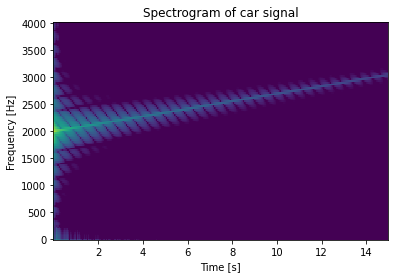

In [6]:
f, ts, Sx = signal.spectrogram(S, fs, nperseg=256) #, nfft=256*2)
dop._plot_spectrogram(f, ts, Sx, title="Spectrogram of car signal")

In [41]:
print("FD=3000 Hz => v = {:.3f} m/s".format(dop._get_doppler_vel(2000, 10.5e9)))
print("FD=3000 Hz => v = {:.3f} m/s".format(dop._get_doppler_vel(3000, 10.5e9)))

FD=3000 Hz => v = 28.571 m/s
FD=3000 Hz => v = 42.857 m/s


In [20]:
## Check kinematics, check doppler
x0=1; v0=28.6; a0=0.5
x=x0+v0*t+0.5*a0*t**2
v=v0+a0*t
f=dop._get_doppler(v)
# print("t=0, v={:.3f}, fD={:.3f} Hz; t=14, v={:.3f}, fD={:.3f} Hz".format(
print("f[0]: {:.3f} Hz; f[-1]: {:.3f} Hz".format(f[0], f[-1]))

f[0]: 2002.000 Hz; f[-1]: 2527.000 Hz


In [37]:
A=1000; 
S2 = A*np.cos(2*np.pi*np.multiply(f,t))
S3 = A*np.cos(2*np.pi*np.cumsum(f/fs))
S4 = A*np.cos(2*np.pi*(2002 + (500)*t/15)*t)

In [9]:
# generate the signal two ways...
S1=np.zeros(t.size)
for i in range(t.size):
    S1[i] = np.cos(2*np.pi*dop._get_doppler(v[i])*t[i])
# Use comprehension?
f2=np.array([dop._get_doppler(vc) for vc in v])
S2=np.cos(2*np.pi*f2*t)
S


In [10]:
t[-1]

15.0

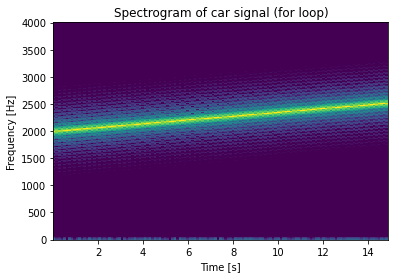

In [24]:
fx, tx, Sx = signal.spectrogram(S3, fs, nperseg=1024) #, nfft=256*2)
dop._plot_spectrogram(fx, tx, Sx, title="Spectrogram of car signal (for loop)")

In [26]:
S4 = np.array([A*np.cos(2*np.pi*dop._get_doppler(v[i])*t[i]) for i in range(t.size)])

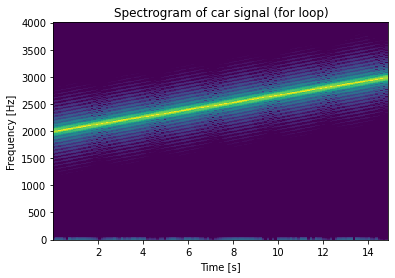

In [38]:
fx, tx, Sx = signal.spectrogram(S4, fs, nperseg=1024) #, nfft=256*2)
dop._plot_spectrogram(fx, tx, Sx, title="Spectrogram of car signal (for loop)")

In [44]:

S1 = np.cos(2*np.pi*f*t)
S2 = np.cos(2*np.pi*np.cumsum(f/8000))

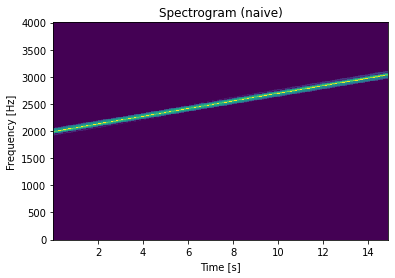

In [53]:
fx, tx, Sx = signal.spectrogram(S1, fs, nperseg=1024) #, nfft=256*2)
dop._plot_spectrogram(fx, tx, Sx, title="Spectrogram (naive)")

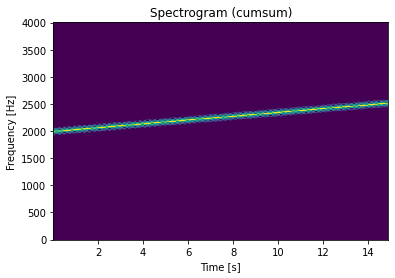

In [55]:
fx, tx, Sx = signal.spectrogram(S2, fs, nperseg=1024) #, nfft=256*2)
dop._plot_spectrogram(fx, tx, Sx, title="Spectrogram (cumsum)")

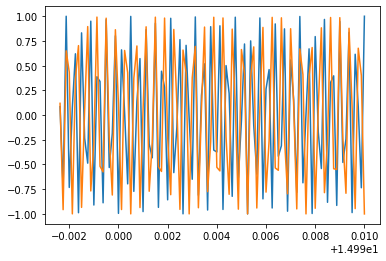

In [61]:
plt.plot(t[119900:], S1[119900:], t[119900:], S2[119900:])

In [67]:
# Try to generate a chirp, 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html
S5=signal.chirp(t,2002,15,2527 )

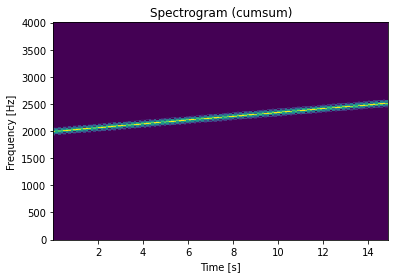

In [68]:
fx, tx, Sx = signal.spectrogram(S5, fs, nperseg=1024) #, nfft=256*2)
dop._plot_spectrogram(fx, tx, Sx, title="Spectrogram (cumsum)")

In [66]:
j = np.array([1,2,3,4,5,6,7,8,9,10])
l = k*j
print(k)
print(l)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 0.          0.22222222  0.66666667  1.33333333  2.22222222  3.33333333
  4.66666667  6.22222222  8.         10.        ]
